In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/VSPlatform.csv

--2023-11-07 13:56:25--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 13.224.9.181, 13.224.9.103, 13.224.9.24, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|13.224.9.181|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3399671 (3.2M) [text/plain]
Saving to: ‘netflix.csv’

netflix.csv         100%[===================>]   3.24M  2.18MB/s    in 1.5s    

2023-11-07 13:56:28 (2.18 MB/s) - ‘netflix.csv’ saved [3399671/3399671]



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
VSPlatform = pd.read_csv('VSPlatform.csv')
VSPlatform.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
new_VSPlatform=pd.read_csv('VSPlatform.csv')

In [ ]:
VSPlatform.shape

(186392, 13)

In [ ]:
VSPlatform.dtypes

show_id                     object
type                        object
title                       object
director                    object
cast                        object
country                     object
date_added          datetime64[ns]
release_year                 int64
rating                      object
duration                   float64
listed_in                   object
description                 object
date_added_month            object
dtype: object

In [ ]:
VSPlatform['listed_in'].value_counts()

In [ ]:
VSPlatform['director'].nunique()

4528

In [ ]:
VSPlatform['country']=VSPlatform['country'].str.split(",")
VSPlatform=VSPlatform.explode('country')

In [ ]:
VSPlatform['listed_in']=VSPlatform['listed_in'].str.split(",")
VSPlatform=VSPlatform.explode('listed_in')

In [ ]:
VSPlatform['date_added']=pd.to_datetime(VSPlatform['date_added'])
VSPlatform['date_added_month']=VSPlatform['date_added'].dt.strftime("%B")

In [ ]:
VSPlatform['cast']=VSPlatform['cast'].str.split(",")
VSPlatform=VSPlatform.explode('cast')

In [ ]:
VSPlatform['duration']=VSPlatform['duration'].str.split().str[0].astype('float')

In [ ]:
def clean_string(x):
  if x.dtype in ['object' , 'str']:
    return x.str.strip()
  else:
    return x

In [ ]:
VSPlatform=VSPlatform.apply(clean_string,axis=0)

In [ ]:
VSPlatform.isna().all(axis=1).any()

False

In [ ]:
VSPlatform.isna().all(axis=0).any()

False

In [ ]:
VSPlatform.isna().any()

show_id             False
type                False
title               False
director            False
cast                False
country             False
date_added           True
release_year        False
rating              False
duration            False
listed_in           False
description         False
date_added_month     True
dtype: bool

In [ ]:
def imputeDire(g):
  d=g['director'].mode().iloc[0]
  return g.fillna({'director':d})

def imputeCast(g):
  c=g['cast'].mode().iloc[0]
  return g.fillna({'cast':c})

def imputeRating(g):
  r= g['rating'].mode().iloc[0]
  return g.fillna({'rating':r})

def imputeDuration(g):
  d=g['duration'].mean()
  return g.fillna({'duration':d})

def imputeCountry(g):
  c= g['country'].mode().iloc[0]
  return g.fillna({'country':c})

def imputeYear(x):
  d=yearMode.loc[x['listed_in']]
  y = d.year
  rel=x['release_year']
  if y < rel:
    return x.fillna({'date_added':pd.to_datetime(f'{rel}-01-01', format='%Y-%m-%d')})
  else:
    return x.fillna({'date_added':d})



In [ ]:
yearMode=VSPlatform.groupby('listed_in')['date_added'].apply(lambda x: x.mode().iloc[0])
yearMode
row=VSPlatform.loc[VSPlatform['date_added'].isna()]

In [ ]:
VSPlatform=VSPlatform.groupby('listed_in',group_keys=False).apply(imputeCast)

In [ ]:
VSPlatform=VSPlatform.groupby('listed_in',group_keys=False).apply(imputeDire)

In [ ]:
VSPlatform=VSPlatform.groupby('listed_in',group_keys=False).apply(imputeRating)

In [ ]:
VSPlatform=VSPlatform.groupby('listed_in',group_keys=False).apply(imputeDuration)

In [ ]:
VSPlatform=VSPlatform.groupby('listed_in',group_keys=False).apply(imputeCountry)

In [ ]:
VSPlatform[VSPlatform.duplicated()]

In [ ]:
VSPlatform.drop_duplicates(inplace=True)

In [ ]:
movieMask = VSPlatform['type']=='Movie'
VSPlatform_movies=VSPlatform[movieMask]
tvMask = VSPlatform['type']=='TV Show'
VSPlatform_tv=VSPlatform[tvMask]

In [ ]:
VSPlatform_movies['listed_in'].value_counts()[:5]

Dramas                  27796
International Movies    26158
Comedies                18229
Action & Adventure      11124
Independent Movies       8815
Name: listed_in, dtype: int64

In [ ]:
VSPlatform_tv['listed_in'].value_counts()[:5]

International TV Shows    12324
TV Dramas                  8475
TV Comedies                4856
Crime TV Shows             4678
Kids' TV                   4552
Name: listed_in, dtype: int64

In [ ]:
top5GenreMask = VSPlatform_movies['listed_in'].value_counts()[:5].index
VSPlatform_top5 = VSPlatform_movies[VSPlatform_movies['listed_in'].isin(top5GenreMask)]
VSPlatform_top5.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_month
7,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,United States,2021-09-24,1993,TV-MA,125.0,Dramas,"On a photo shoot in Ghana, an American model s...",September
7,s8,Movie,Sankofa,Haile Gerima,Oyafunmike Ogunlano,United States,2021-09-24,1993,TV-MA,125.0,Dramas,"On a photo shoot in Ghana, an American model s...",September
7,s8,Movie,Sankofa,Haile Gerima,Alexandra Duah,United States,2021-09-24,1993,TV-MA,125.0,Dramas,"On a photo shoot in Ghana, an American model s...",September
7,s8,Movie,Sankofa,Haile Gerima,Nick Medley,United States,2021-09-24,1993,TV-MA,125.0,Dramas,"On a photo shoot in Ghana, an American model s...",September
7,s8,Movie,Sankofa,Haile Gerima,Mutabaruka,United States,2021-09-24,1993,TV-MA,125.0,Dramas,"On a photo shoot in Ghana, an American model s...",September


In [ ]:
top5GenreMaskTV = VSPlatform_tv['listed_in'].value_counts()[:5].index
VSPlatform_top5TV = VSPlatform_tv[VSPlatform_tv['listed_in'].isin(top5GenreMaskTV)]
VSPlatform_top5TV.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_month
1,s2,TV Show,Blood & Water,Noam Murro,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2.0,International TV Shows,"After crossing paths at a party, a Cape Town t...",September
1,s2,TV Show,Blood & Water,Noam Murro,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2.0,International TV Shows,"After crossing paths at a party, a Cape Town t...",September
1,s2,TV Show,Blood & Water,Noam Murro,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2.0,International TV Shows,"After crossing paths at a party, a Cape Town t...",September
1,s2,TV Show,Blood & Water,Noam Murro,Thabang Molaba,South Africa,2021-09-24,2021,TV-MA,2.0,International TV Shows,"After crossing paths at a party, a Cape Town t...",September
1,s2,TV Show,Blood & Water,Noam Murro,Dillon Windvogel,South Africa,2021-09-24,2021,TV-MA,2.0,International TV Shows,"After crossing paths at a party, a Cape Town t...",September


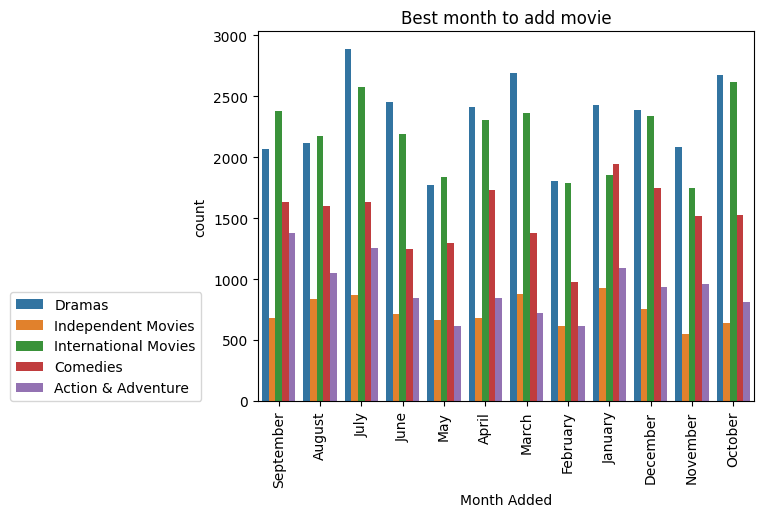

In [ ]:
sns.countplot(data=VSPlatform_top5,x=VSPlatform_top5['date_added_month'],hue='listed_in')
plt.xticks(rotation=90)
plt.title("Best month to add movie")
plt.legend(loc=(-0.5,0))
plt.xlabel('Month Added')
plt.show()

In [ ]:
VSPlatform_top5.groupby(['listed_in','date_added_month']).agg({'title':['count']}).sort_values(by=('title','count'),ascending=False)

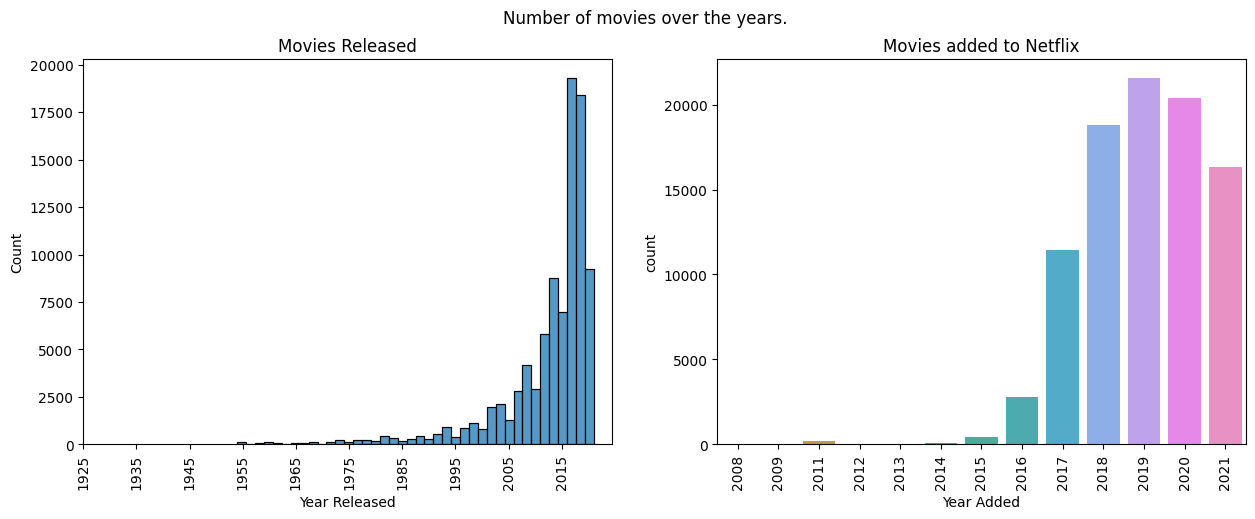

In [ ]:
plt.figure(figsize=(15,5))
plt.suptitle("Number of movies over the years.")
plt.subplot(1,2,1)
sns.histplot(data=VSPlatform_top5,x=VSPlatform_top5['release_year'],bins=40)
plt.xticks(np.arange(1925,2022,10),rotation=90)
plt.title("Movies Released")
# plt.legend(loc=(-0.5,0))
plt.xlabel('Year Released')

plt.subplot(1,2,2)
sns.countplot(data=VSPlatform_top5,x=VSPlatform_top5['date_added'].dt.year)
plt.xticks(rotation=90)
plt.xlabel('Year Added')
plt.title("Movies added to VSPlatform")
plt.show()
# plt.legend(loc=(-0.5,0))


plt.show()

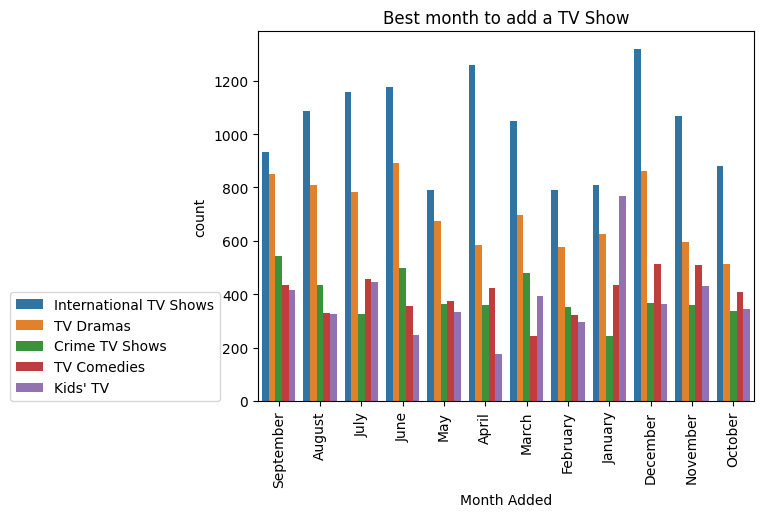

In [ ]:
sns.countplot(data=VSPlatform_top5TV,x=VSPlatform_top5TV['date_added_month'],hue='listed_in')
plt.xticks(rotation=90)
plt.title("Best month to add a TV Show")
plt.legend(loc=(-0.5,0))
plt.xlabel('Month Added')
plt.show()

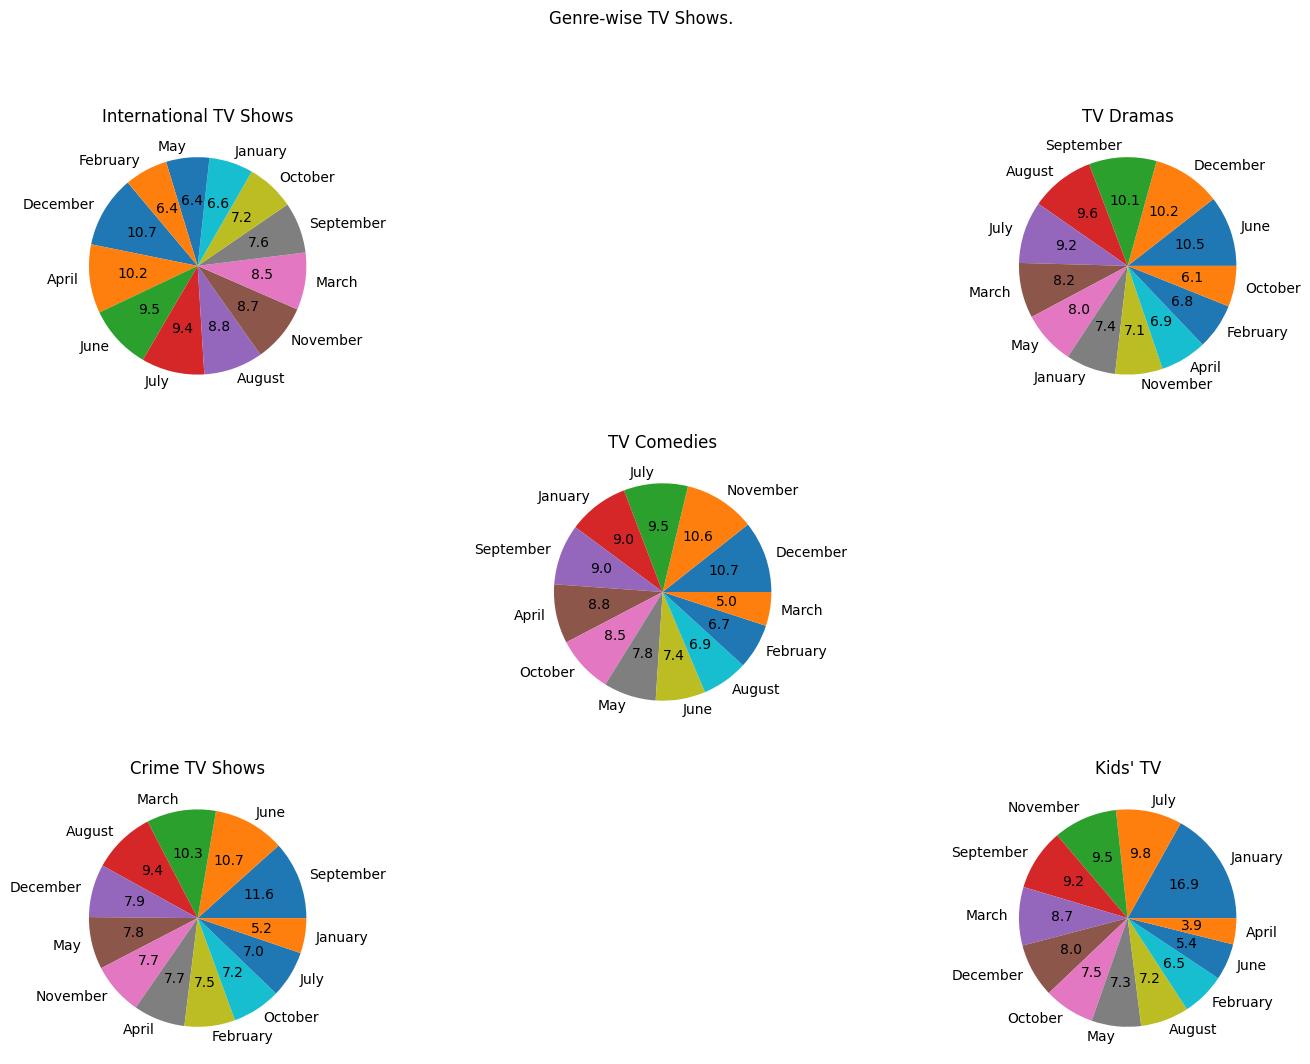

In [ ]:
plt.figure(figsize=(17,12))
plt.suptitle("Genre-wise TV Shows.")
plt.subplot(3,3,1)
plt.title('International TV Shows')
data=VSPlatform_top5TV[VSPlatform_top5TV['listed_in']=='International TV Shows']['date_added_month'].value_counts()
plt.pie(data,labels=data.index,autopct='%1.1f',startangle=130)

plt.subplot(3,3,3)
plt.title('TV Dramas')
data=VSPlatform_top5TV[VSPlatform_top5TV['listed_in']=='TV Dramas']['date_added_month'].value_counts()
plt.pie(data,labels=data.index,autopct='%1.1f')

plt.subplot(3,3,5)
plt.title('TV Comedies')
data=VSPlatform_top5TV[VSPlatform_top5TV['listed_in']=='TV Comedies']['date_added_month'].value_counts()
plt.pie(data,labels=data.index,autopct='%1.1f')

plt.subplot(3,3,7)
plt.title('Crime TV Shows')
data=VSPlatform_top5TV[VSPlatform_top5TV['listed_in']=='Crime TV Shows']['date_added_month'].value_counts()
plt.pie(data,labels=data.index,autopct='%1.1f')

plt.subplot(3,3,9)
plt.title('Kids\' TV')
data=VSPlatform_top5TV[VSPlatform_top5TV['listed_in']=='Kids\' TV']['date_added_month'].value_counts()
plt.pie(data,labels=data.index,autopct='%1.1f')

plt.show()

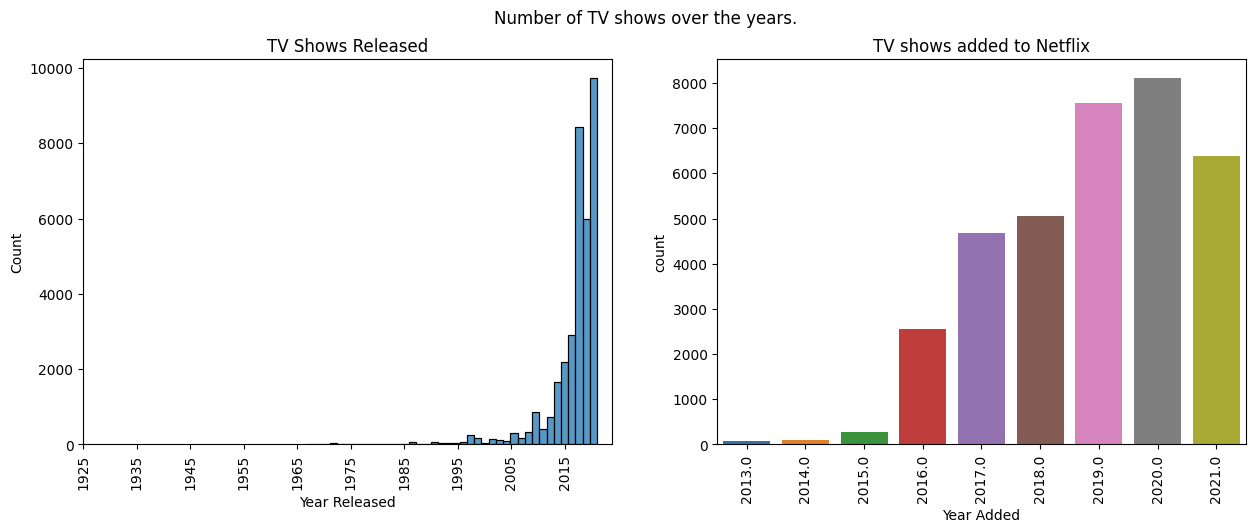

In [ ]:
plt.figure(figsize=(15,5))
plt.suptitle("Number of TV shows over the years.")
plt.subplot(1,2,1)
sns.histplot(data=VSPlatform_top5TV,x=VSPlatform_top5TV['release_year'],bins=40)
plt.xticks(np.arange(1925,2022,10),rotation=90)
plt.title("TV Shows Released")
# plt.legend(loc=(-0.5,0))
plt.xlabel('Year Released')

plt.subplot(1,2,2)
sns.countplot(data=VSPlatform_top5TV,x=VSPlatform_top5TV['date_added'].dt.year)
plt.xticks(rotation=90)
plt.xlabel('Year Added')
plt.title("TV shows added to VSPlatform")
# plt.legend(loc=(-0.5,0))


plt.show()

In [ ]:
top15CastMovie=VSPlatform_top5['cast'].value_counts()[:15].index
topActorMovies=VSPlatform_top5[VSPlatform_top5['cast'].isin(top15CastMovie)]
topActorMovies.head()

In [ ]:
top15CastTv=VSPlatform_top5TV['cast'].value_counts()[:16].index
topActorTv=VSPlatform_top5TV[VSPlatform_top5TV['cast'].isin(top15CastTv)]
topActorTv.head()

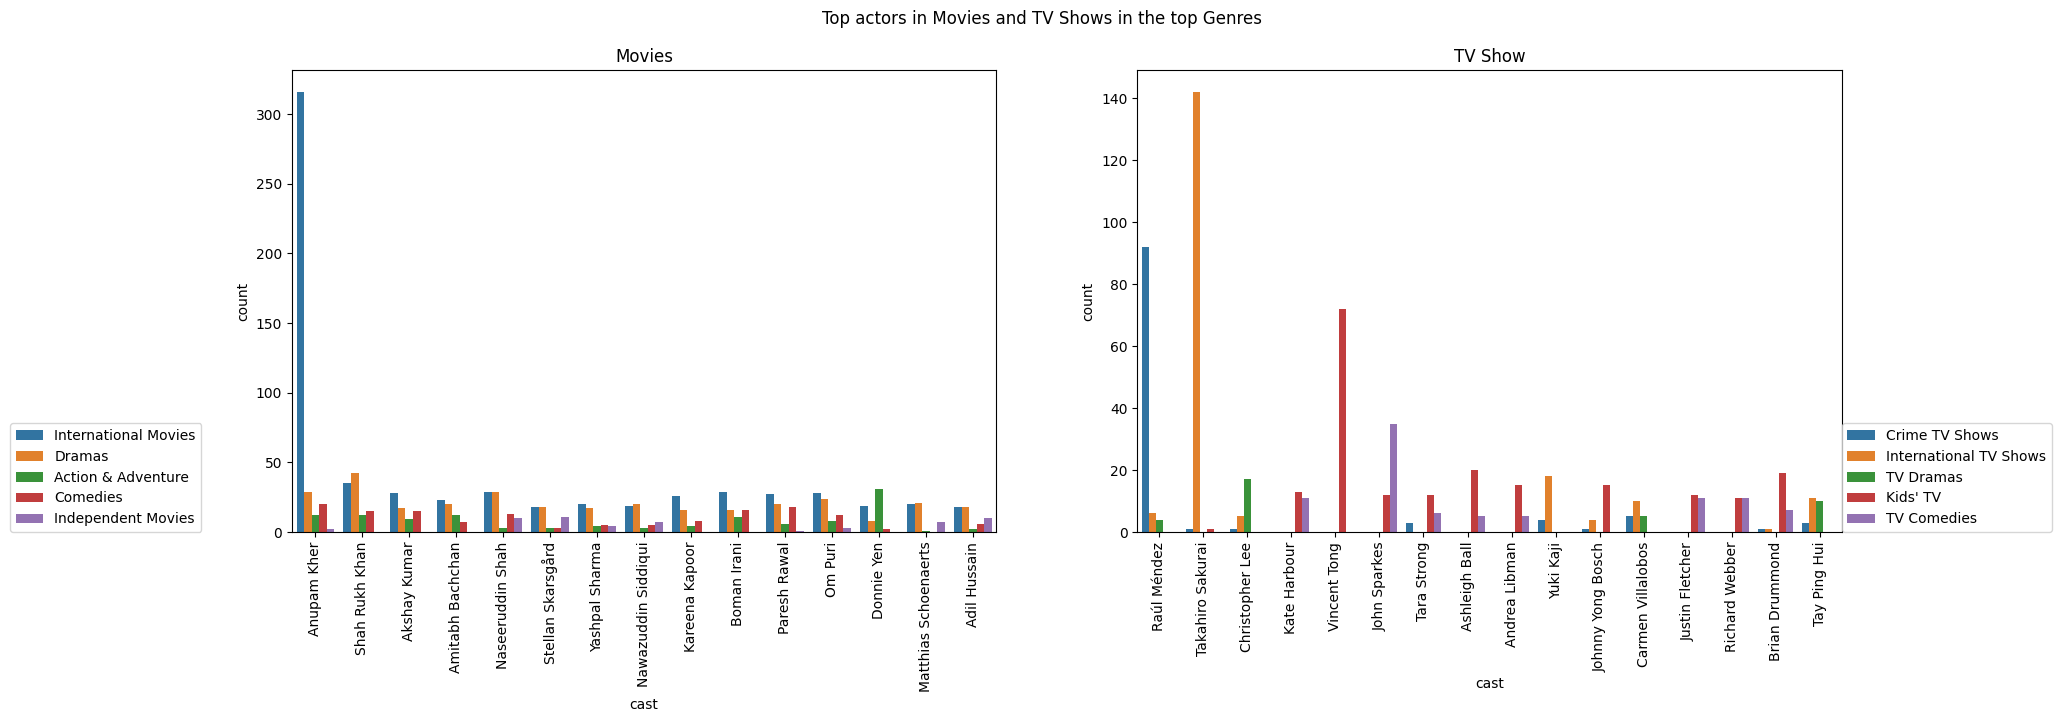

In [ ]:
plt.figure(figsize=(20,6))
plt.suptitle('Top actors in Movies and TV Shows in the top Genres')
plt.subplot(1,2,1)
plt.title('Movies')
sns.countplot(data=topActorMovies,x='cast', hue='listed_in')
plt.legend(loc=(-0.4,0))
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title('TV Show')
sns.countplot(data=topActorTv,x='cast',hue='listed_in')
plt.xticks(rotation=90)
plt.legend(loc=(1,0))

plt.show()